## IMPORTING REQUIRED PACKAGEDS

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


# READING THE DATA  

data=pd.read_csv("C:/Users/HP/Downloads/heart_failure_clinical_records_dataset.csv")

data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


## Analyzing the data


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

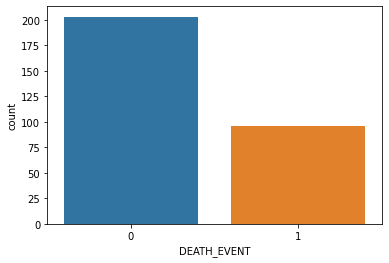

In [48]:
sns.countplot(x="DEATH_EVENT",data=data)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

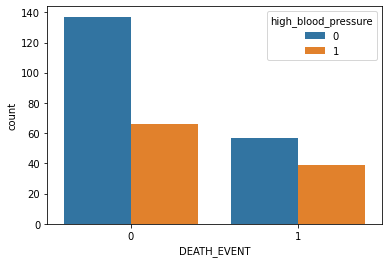

In [49]:
sns.countplot(x="DEATH_EVENT",hue="high_blood_pressure",data=data)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

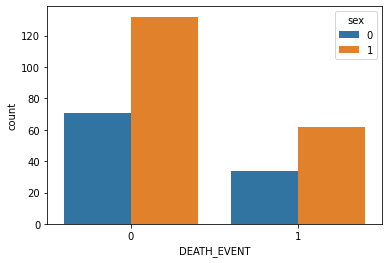

In [50]:
sns.countplot(x="DEATH_EVENT",hue="sex",data=data)

<AxesSubplot:ylabel='Frequency'>

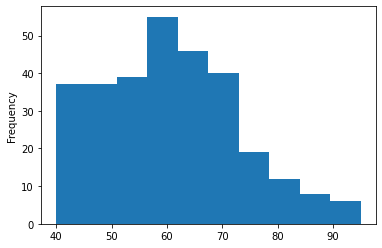

In [51]:
data["age"].plot.hist()

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## cleaning the data

In [53]:
data.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [54]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<AxesSubplot:>

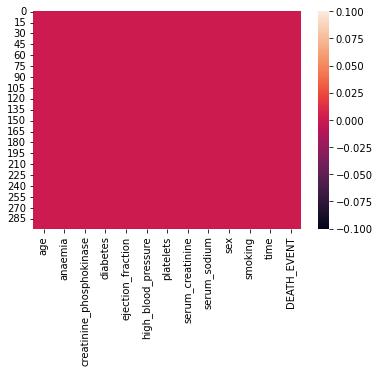

In [55]:
sns.heatmap(data.isnull())

## splitting data

In [56]:
# train data
x=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [58]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [60]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))


In [61]:
classifier.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu'))

In [62]:
classifier.add(Dense(4, kernel_initializer = 'uniform', activation = 'relu'))

In [63]:
classifier.add(Dense(2, kernel_initializer = 'uniform', activation = 'relu'))

In [64]:
#output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [65]:

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [66]:
classifier.fit(x_train, y_train, batch_size = 10, epochs = 100,verbose = 0)

In [67]:
score, acc = classifier.evaluate(x_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

20/20 [==============================] - 0s 2ms/step - loss: 0.6309 - accuracy: 0.6750
Train score: 0.630937933921814
Train accuracy: 0.675000011920929


In [68]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(x_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)
# Making the Confusion Matrix

4/4 [==============================] - 0s 2ms/step
********************
10/10 [==============================] - 0s 3ms/step - loss: 0.6229 - accuracy: 0.6869
Test score: 0.6229381561279297
Test accuracy: 0.6868686676025391


In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 15.0, 'Predicted labek')

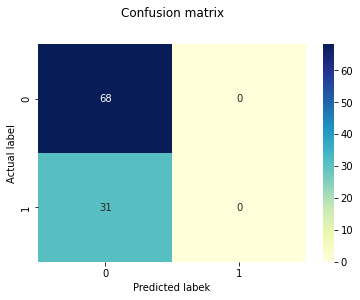

In [70]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted labek')

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        68
           1       0.00      0.00      0.00        31

    accuracy                           0.69        99
   macro avg       0.34      0.50      0.41        99
weighted avg       0.47      0.69      0.56        99



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
# Improving the ANN
from keras.layers import Dropout
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense( 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
classifier.add(Dropout(rate = 0.1))

# Adding the second hidden layer
classifier.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.1))

# Adding the third hidden layer
classifier.add(Dense(4, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.1))

# Adding the fourth hidden layer
classifier.add(Dense(2, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.1))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(x_train, y_train, batch_size = 10, epochs = 100,verbose = 0)

# Part 3 - Making predictions and evaluating the model

score, acc = classifier.evaluate(x_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(x_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

20/20 [==============================] - 1s 2ms/step - loss: 0.6309 - accuracy: 0.6750
Train score: 0.6308749318122864
Train accuracy: 0.675000011920929
4/4 [==============================] - 0s 2ms/step
********************
10/10 [==============================] - 0s 2ms/step - loss: 0.6228 - accuracy: 0.6869
Test score: 0.6228126883506775
Test accuracy: 0.6868686676025391


Text(0.5, 15.0, 'Predicted label')

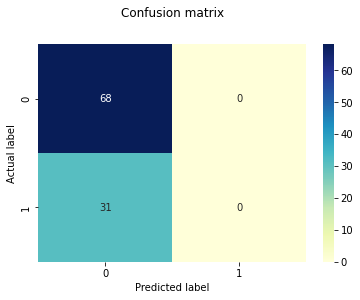

In [74]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')